In [10]:
## Exploratory Data Analysis (EDA) for Titanic Dataset ----------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [13]:
# 1. Load dataset
DATA_PATH = "Titanic-Dataset.csv"   # update path if needed
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)

Shape: (891, 12)


In [14]:
# 2. Quick peek
print("\nHEAD:")
print(df.head())

print("\nDTYPES / non-null counts / unique values:")
info_df = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "non_null_count": df.notnull().sum(),
    "unique": df.nunique()
})
print(info_df)


HEAD:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN       

In [15]:
# 3. Summary statistics
print("\nNumeric summary:")
print(df.describe())

print("\nAll columns summary (first 5):")
print(df.describe(include='all').head())


Numeric summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

All columns summary (first 5):
        PassengerId    Survived

In [16]:
# 4. Missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({"missing_count": missing, "missing_percent": missing_percent})
print("\nMissing values:")
print(missing_df)



Missing values:
             missing_count  missing_percent
Cabin                  687        77.104377
Age                    177        19.865320
Embarked                 2         0.224467
PassengerId              0         0.000000
Survived                 0         0.000000
Pclass                   0         0.000000
Name                     0         0.000000
Sex                      0         0.000000
SibSp                    0         0.000000
Parch                    0         0.000000
Ticket                   0         0.000000
Fare                     0         0.000000


In [17]:
# 5. Categorical counts
for c in ['Sex', 'Embarked', 'Pclass', 'Survived']:
    if c in df.columns:
        print(f"\nValue counts for {c}:")
        print(df[c].value_counts(dropna=False))



Value counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Value counts for Embarked:
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Value counts for Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Value counts for Survived:
Survived
0    549
1    342
Name: count, dtype: int64


In [18]:
# 6. Numeric features focus
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:", numeric_cols)
focus_numeric = [c for c in ['Age', 'Fare', 'SibSp', 'Parch'] if c in df.columns]



Numeric columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


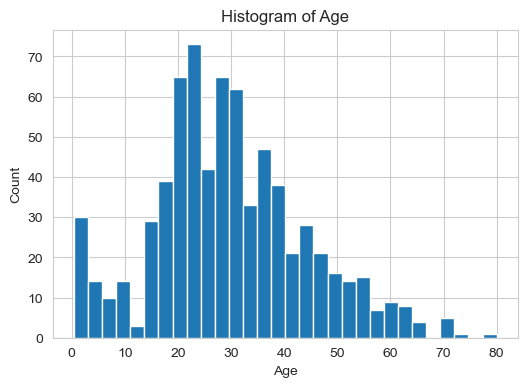

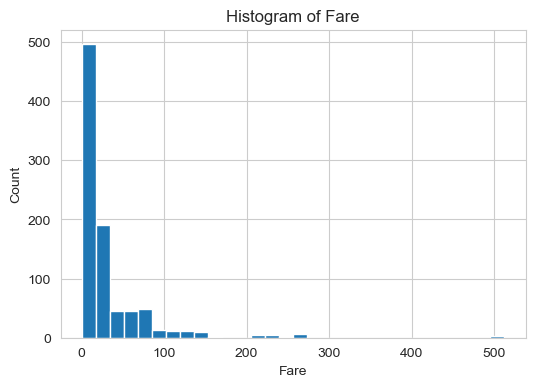

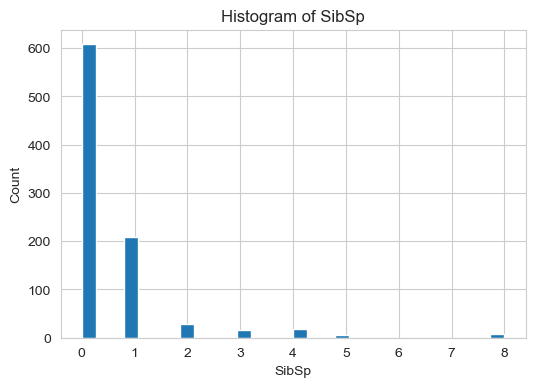

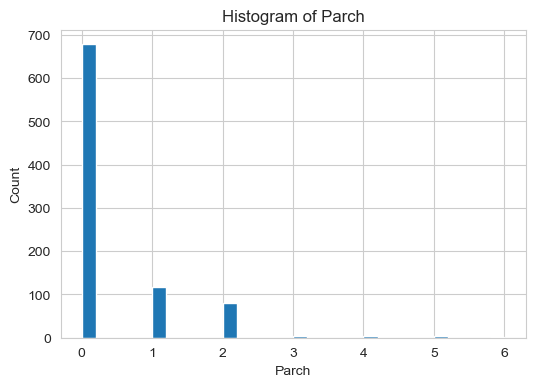

In [19]:
# 7. Histograms
for col in focus_numeric:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

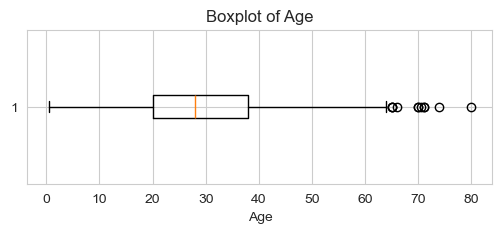

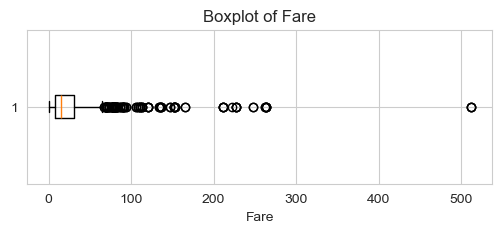

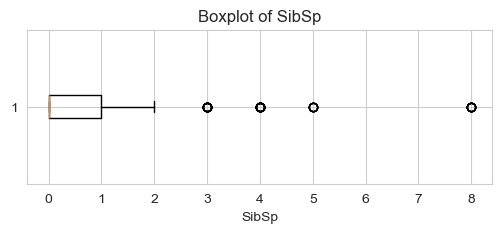

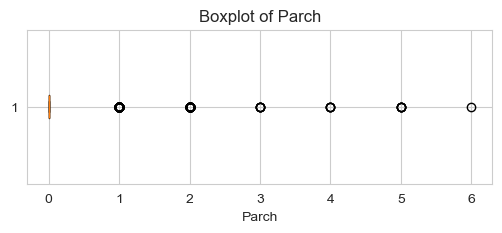

In [21]:
# 8. Boxplots
for col in focus_numeric:
    plt.figure(figsize=(6,2))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

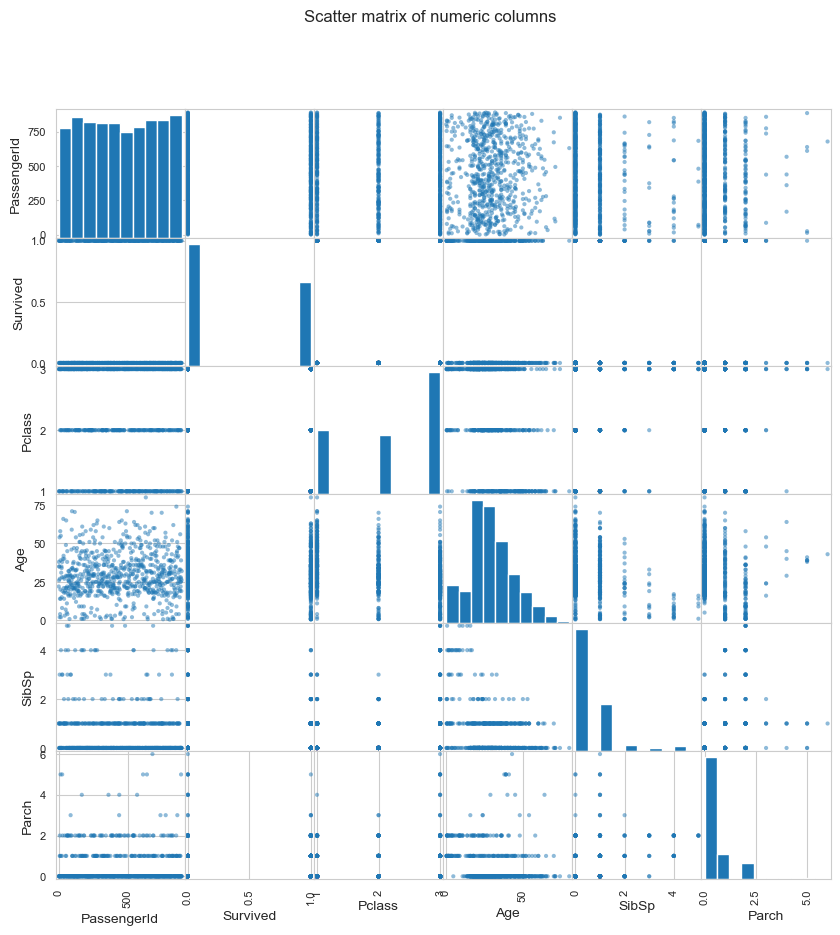

In [22]:
# 9. Pairwise scatter matrix
pair_cols = numeric_cols[:6]  # limit to 6 cols
if len(pair_cols) >= 2:
    scatter_matrix(df[pair_cols].dropna(), diagonal='hist', figsize=(10,10))
    plt.suptitle("Scatter matrix of numeric columns")
    plt.show()


Correlation matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


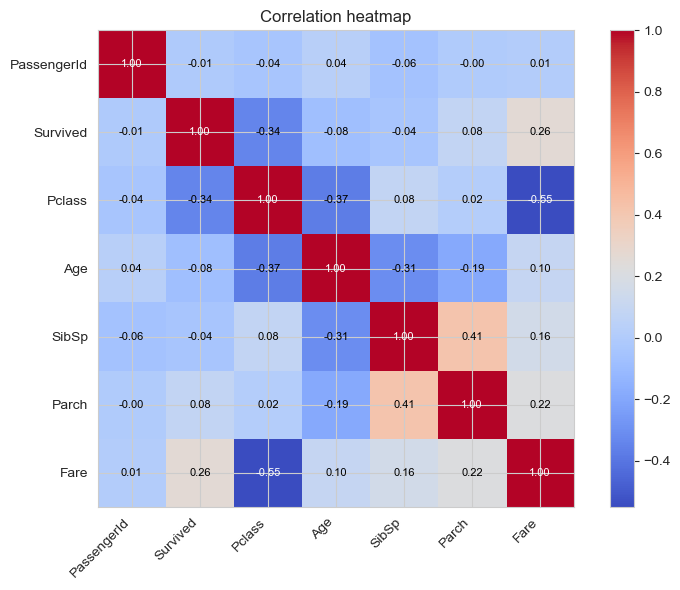

In [24]:
# 10. Correlation heatmap
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr()
    print("\nCorrelation matrix:")
    print(corr)

    plt.figure(figsize=(8,6))
    im = plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
    plt.colorbar(im)
    ticks = np.arange(len(numeric_cols))
    plt.xticks(ticks, numeric_cols, rotation=45, ha='right')
    plt.yticks(ticks, numeric_cols)
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center',
                     fontsize=8, color='w' if abs(corr.iloc[i,j])>0.5 else 'k')
    plt.title("Correlation heatmap")
    plt.tight_layout()
    plt.show()

In [25]:
# 11. Outlier detection (IQR)
print("\nOutlier summary (IQR method):")
for col in focus_numeric:
    s = df[col].dropna()
    Q1, Q3 = s.quantile(0.25), s.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = s[(s < lower) | (s > upper)]
    print(f"{col}: {len(outliers)} outliers out of {len(s)} values "
          f"(bounds: {lower:.2f}, {upper:.2f})")


Outlier summary (IQR method):
Age: 11 outliers out of 714 values (bounds: -6.69, 64.81)
Fare: 116 outliers out of 891 values (bounds: -26.72, 65.63)
SibSp: 46 outliers out of 891 values (bounds: -1.50, 2.50)
Parch: 213 outliers out of 891 values (bounds: 0.00, 0.00)


In [26]:
# 12. Quick inferences
print("\n--- Basic inferences ---")
if 'Cabin' in df.columns:
    print("Cabin has high missingness (>20%).")
if 'Age' in df.columns:
    print(f"Age missing: {df['Age'].isnull().mean()*100:.1f}% rows")
if 'Fare' in df.columns:
    print(f"Fare median: {df['Fare'].median():.2f} (distribution is right-skewed)")


--- Basic inferences ---
Cabin has high missingness (>20%).
Age missing: 19.9% rows
Fare median: 14.45 (distribution is right-skewed)
